### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/LaboratorioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio final.
## Aprendizaje estadístico.

Los siguientes dataset (DataTrain,DataTest)contiene información para entrenar un modelo y realizar la predecicción de la diferencia  del  consumo de combustible en barcos, su tarea será encontrar el mejor modelo que permita determinar la diferencia del contador de flujo de combustible, empleando los datos suministrados en el dataset de nombre DataTest.


La descripcion de los dataset son dadas a continuación:

- El  dataset [DataTrain](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTrain.xlsx)
 contiene datos para las  variables : Date	Latitude_degree	Longitude_degree	Beaufort	Speed(Ground)	M/E REVOLUTION	M/E F O FLOW COUNTER,  






- El dataset [DataTrainVyg](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/Data_trainVyg.xlsx)
, contiene datos de Date(UTC)	DRAFT.

- El dataset [DataTest](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTest.xlsx)
, es el dataset con el que probarás tu modelo después de ser entrenado.

La descripción de las variables son las siguientes:


- Date: Es la fecha en que se registraron los datos

- Latitude_degree: Es la coordenada que indica la posición norte o sur de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el ecuador (0°) hasta los polos (90° o -90°). Por ejemplo, la latitud de Medellín es 6.244° N.

- Longitude_degree: Es la coordenada que indica la posición este o oeste de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el meridiano de Greenwich (0°) hasta los antimeridianos (180° o -180°). Por ejemplo, la longitud de Medellín es 75.574° W.


- Beaufort: Es una escala que mide la intensidad del viento basándose en el estado del mar o en los efectos del viento sobre la superficie terrestre. Tiene 13 niveles, desde 0 (calma) hasta 12 (huracán). Por ejemplo, un viento de fuerza 5 en la escala de Beaufort tiene una velocidad de 29 a 38 km/h y produce olas moderadas.


- Speed(Ground): Es la velocidad a la que se desplaza un objeto sobre la superficie terrestre, normalmente en kilómetros por hora (km/h) o en nudos (kt). Por ejemplo, la velocidad de un avión comercial puede ser de unos 900 km/h o 486 kt.


- M/E REVOLUTION : Es la velocidad angular o número de revoluciones por minuto (rpm) de un motor eléctrico o de una máquina. Por ejemplo, un motor eléctrico puede tener una velocidad de 1800 rpm.


- DRAFT: Es la profundidad vertical de un barco o de otro objeto flotante desde la línea de flotación hasta el fondo de la quilla. Se mide normalmente en metros (m) o en pies (ft). Por ejemplo, el calado de un portaaviones puede ser de unos 12 m o 39 ft.


- M/E F O FLOW COUNTER: Es el contador que mide el flujo de combustible (fuel oil) que entra o sale de un motor eléctrico o de una máquina. Por ejemplo, un contador puede registrar que un motor consume 10 litros de combustible por hora.



In [ ]:
import pandas as pd
dfT=pd.read_excel("https://raw.githubusercontent.com/DiegoGarro3/Curso_aprendizaje_estadistico/main/datasets/DataTrain.xlsx")
dfTD=pd.read_excel("https://raw.githubusercontent.com/DiegoGarro3/Curso_aprendizaje_estadistico/main/datasets/Data_trainVyg.xlsx")
dfTest=pd.read_excel("https://raw.githubusercontent.com/DiegoGarro3/Curso_aprendizaje_estadistico/main/datasets/DataTest.xlsx")
#hacer una regresion o un clasificacion? es una regresion, multivariada

In [ ]:
#dfT.tail(50)
dfT["Date"] = pd.to_datetime(dfT["Date"])
print(dfT["Date"])
dfT=dfT.set_index("Date")


0       2016-06-03 01:00:00
1       2016-06-03 02:00:00
2       2016-06-03 03:00:00
3       2016-06-03 04:00:00
4       2016-06-03 05:00:00
                ...        
19995   2018-11-27 05:00:00
19996   2018-11-27 06:00:00
19997   2018-11-27 07:00:00
19998   2018-11-27 08:00:00
19999   2018-11-27 09:00:00
Name: Date, Length: 20000, dtype: datetime64[ns]


In [ ]:

#print(dfTD.index.year)
dfTD["Date(UTC)"] = pd.to_datetime(dfTD["Date(UTC)"],format="%Y%m%d%H")
dfTD=dfTD.rename(columns={"Date(UTC)":"Date"}) #homogeneization of index
dfTD=dfTD.set_index("Date")
#change name Date(UTC)
#print(dfTD["Date(UTC)"])
dfTD


vyg  DRAFT
Date                           
2016-06-03 01:00:00    0  9.175
2016-06-25 00:00:00    1  9.250
2016-06-27 00:00:00    2  9.365
2016-06-29 01:00:00    3  8.645
2016-07-06 00:00:00    4  7.805
...                  ...    ...
2019-04-21 01:00:00  106  7.425
2019-04-23 09:00:00  107  9.335
2019-05-07 00:00:00  108  9.240
2019-05-21 01:00:00  109  7.435
2019-05-23 00:00:00  110  9.350

[111 rows x 2 columns]

Draft is measured once and then the value remains the same as the ship travels across the ocean untill it reaches a new port where it discharges some of the load and then the draft changes and is measured again, Vyg seems to enumarate each draft measurement

#Merge types

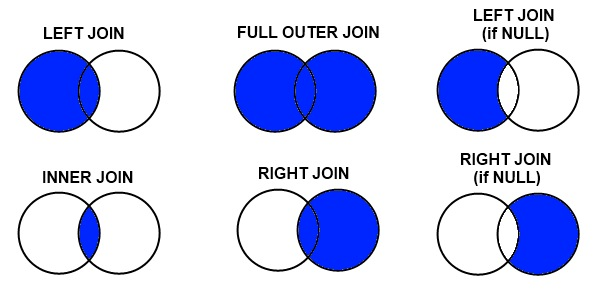

por lo que left join conserva todos los datos de df, mientras que right join conservaria solo los datos del Draft que son menos, inner cojeria solo los que tienen fecha en comun y outer los del df agregando fechas y horas que no estan en el dataframe pero si el draft, outter no se puede ya que no hay criterio para llenar todas las columnas del df que no aparecen en draft

In [ ]:
FullDrafts=dfTD.copy()
FullDrafts["DRAFT"] = FullDrafts['DRAFT'].fillna(method='ffill')
dfTD=dfTD[dfTD.index <= "2019"]
dfTD

vyg  DRAFT
Date                           
2016-06-03 01:00:00    0  9.175
2016-06-25 00:00:00    1  9.250
2016-06-27 00:00:00    2  9.365
2016-06-29 01:00:00    3  8.645
2016-07-06 00:00:00    4  7.805
...                  ...    ...
2018-10-26 00:00:00   88  9.420
2018-10-29 00:00:00   89  8.720
2018-11-05 00:00:00   90  7.610
2018-11-28 00:00:00   91  9.460
2018-12-15 00:00:00   92  8.175

[93 rows x 2 columns]

In [ ]:

#leftjoin or merge
#merged_df=pd.merge(dfT,dfTD, on="Date",how="outer") #outer,inner,left,right
merged_df=pd.merge(dfT,dfTD, on="Date",how="left")
merged_df

Latitude_degree  Longitude_degree Beaufort  \
Date                                                              
2016-06-03 01:00:00        35.175000        141.595556   medium   
2016-06-03 02:00:00        35.315833        141.884444   medium   
2016-06-03 03:00:00        35.458333        142.121111   medium   
2016-06-03 04:00:00        35.573611        142.548611   medium   
2016-06-03 05:00:00        35.939722        142.768889   medium   
...                              ...               ...      ...   
2018-11-27 05:00:00        34.751111        137.318333      low   
2018-11-27 06:00:00        34.750556        137.317778      low   
2018-11-27 07:00:00        34.750833        137.317500      low   
2018-11-27 08:00:00        34.751111        137.317500      low   
2018-11-27 09:00:00        34.750833        137.318056      low   

                     Speed(Ground)  M/E REVOLUTION  M/E F O FLOW COUNTER  vyg  \
Date                                                                            
2016-06-03 01:00:00           17.5              86               2531274  0.0   
2016-06-03 02:00:00           18.3              86               2531443  NaN   
2016-06-03 03:00:00           18.4              86               2531608  NaN   
2016-06-03 04:00:00           18.1              86               2531771  NaN   
2016-06-03 05:00:00           18.8              86               2531934  NaN   
...                            ...             ...                   ...  ...   
2018-11-27 05:00:00            0.0               0               5165079  NaN   
2018-11-27 06:00:00            0.0               0               5165079  NaN   
2018-11-27 07:00:00            0.0               0               5165079  NaN   
2018-11-27 08:00:00            0.0               0               5165079  NaN   
2018-11-27 09:00:00            0.0               0               5165079  NaN   

                     DRAFT  
Date                        
2016-06-03 01:00:00  9.175  
2016-06-03 02:00:00    NaN  
2016-06-03 03:00:00    NaN  
2016-06-03 04:00:00    NaN  
2016-06-03 05:00:00    NaN  
...                    ...  
2018-11-27 05:00:00    NaN  
2018-11-27 06:00:00    NaN  
2018-11-27 07:00:00    NaN  
2018-11-27 08:00:00    NaN  
2018-11-27 09:00:00    NaN  

[20000 rows x 8 columns]

In [ ]:
#for merge_df.DRAFT... if draft[i] is nan, draft[i]=draft[i-1]
# Llenar NaN utilizando el valor no nulo más cercano hacia arriba (anterior)
merged_df["DRAFT"] = merged_df['DRAFT'].fillna(method='ffill')
merged_df["vyg"] = merged_df['vyg'].fillna(method='ffill')
merged_df
#score vs diferencia horaria tomada

Latitude_degree  Longitude_degree Beaufort  \
Date                                                              
2016-06-03 01:00:00        35.175000        141.595556   medium   
2016-06-03 02:00:00        35.315833        141.884444   medium   
2016-06-03 03:00:00        35.458333        142.121111   medium   
2016-06-03 04:00:00        35.573611        142.548611   medium   
2016-06-03 05:00:00        35.939722        142.768889   medium   
...                              ...               ...      ...   
2018-11-27 05:00:00        34.751111        137.318333      low   
2018-11-27 06:00:00        34.750556        137.317778      low   
2018-11-27 07:00:00        34.750833        137.317500      low   
2018-11-27 08:00:00        34.751111        137.317500      low   
2018-11-27 09:00:00        34.750833        137.318056      low   

                     Speed(Ground)  M/E REVOLUTION  M/E F O FLOW COUNTER  \
Date                                                                       
2016-06-03 01:00:00           17.5              86               2531274   
2016-06-03 02:00:00           18.3              86               2531443   
2016-06-03 03:00:00           18.4              86               2531608   
2016-06-03 04:00:00           18.1              86               2531771   
2016-06-03 05:00:00           18.8              86               2531934   
...                            ...             ...                   ...   
2018-11-27 05:00:00            0.0               0               5165079   
2018-11-27 06:00:00            0.0               0               5165079   
2018-11-27 07:00:00            0.0               0               5165079   
2018-11-27 08:00:00            0.0               0               5165079   
2018-11-27 09:00:00            0.0               0               5165079   

                      vyg  DRAFT  
Date                              
2016-06-03 01:00:00   0.0  9.175  
2016-06-03 02:00:00   0.0  9.175  
2016-06-03 03:00:00   0.0  9.175  
2016-06-03 04:00:00   0.0  9.175  
2016-06-03 05:00:00   0.0  9.175  
...                   ...    ...  
2018-11-27 05:00:00  90.0  7.610  
2018-11-27 06:00:00  90.0  7.610  
2018-11-27 07:00:00  90.0  7.610  
2018-11-27 08:00:00  90.0  7.610  
2018-11-27 09:00:00  90.0  7.610  

[20000 rows x 8 columns]

Breve validacion del dataset

In [ ]:
null = merged_df.isnull().sum()
na = merged_df.isna().sum()
print(null,na)
#validatedraft = merged_df[merged_df.index==dfTD.index]
#validatedraft=merged_df.loc[dfTD.index[:99]]
#for con todas las fechas de todos los draft (dfTD) para confirmar que los draft siguen siendo los mismos para cada fecha
validatedraft=merged_df.loc["2016-06-27 00:00:00"] #El tercer draft es igual que su correspondiente fecha en merged dataset?
onedraft=dfTD.loc["2016-06-27 00:00:00"]
#print(validatedraft==dfTD)
print(validatedraft.DRAFT==onedraft.DRAFT)

Latitude_degree         0
Longitude_degree        0
Beaufort                0
Speed(Ground)           0
M/E REVOLUTION          0
M/E F O FLOW COUNTER    0
vyg                     0
DRAFT                   0
dtype: int64 Latitude_degree         0
Longitude_degree        0
Beaufort                0
Speed(Ground)           0
M/E REVOLUTION          0
M/E F O FLOW COUNTER    0
vyg                     0
DRAFT                   0
dtype: int64
True


In [ ]:
#df["Date"] = pd.to_datetime(df["Date"],format="%Y%m%d%H")
print(dfTest["Date"])

0      2018-11-27 10:00:00
1      2018-11-27 11:00:00
2      2018-11-27 12:00:00
3      2018-11-27 13:00:00
4      2018-11-27 14:00:00
               ...        
4424   2019-06-02 19:00:00
4425   2019-06-02 20:00:00
4426   2019-06-02 21:00:00
4427   2019-06-02 22:00:00
4428   2019-06-02 23:00:00
Name: Date, Length: 4429, dtype: datetime64[ns]


#Data visualization and time series

In [ ]:
merged_df

Latitude_degree  Longitude_degree Beaufort  \
Date                                                              
2016-06-03 01:00:00        35.175000        141.595556   medium   
2016-06-03 02:00:00        35.315833        141.884444   medium   
2016-06-03 03:00:00        35.458333        142.121111   medium   
2016-06-03 04:00:00        35.573611        142.548611   medium   
2016-06-03 05:00:00        35.939722        142.768889   medium   
...                              ...               ...      ...   
2018-11-27 05:00:00        34.751111        137.318333      low   
2018-11-27 06:00:00        34.750556        137.317778      low   
2018-11-27 07:00:00        34.750833        137.317500      low   
2018-11-27 08:00:00        34.751111        137.317500      low   
2018-11-27 09:00:00        34.750833        137.318056      low   

                     Speed(Ground)  M/E REVOLUTION  M/E F O FLOW COUNTER  \
Date                                                                       
2016-06-03 01:00:00           17.5              86               2531274   
2016-06-03 02:00:00           18.3              86               2531443   
2016-06-03 03:00:00           18.4              86               2531608   
2016-06-03 04:00:00           18.1              86               2531771   
2016-06-03 05:00:00           18.8              86               2531934   
...                            ...             ...                   ...   
2018-11-27 05:00:00            0.0               0               5165079   
2018-11-27 06:00:00            0.0               0               5165079   
2018-11-27 07:00:00            0.0               0               5165079   
2018-11-27 08:00:00            0.0               0               5165079   
2018-11-27 09:00:00            0.0               0               5165079   

                      vyg  DRAFT  
Date                              
2016-06-03 01:00:00   0.0  9.175  
2016-06-03 02:00:00   0.0  9.175  
2016-06-03 03:00:00   0.0  9.175  
2016-06-03 04:00:00   0.0  9.175  
2016-06-03 05:00:00   0.0  9.175  
...                   ...    ...  
2018-11-27 05:00:00  90.0  7.610  
2018-11-27 06:00:00  90.0  7.610  
2018-11-27 07:00:00  90.0  7.610  
2018-11-27 08:00:00  90.0  7.610  
2018-11-27 09:00:00  90.0  7.610  

[20000 rows x 8 columns]

In [ ]:
dfTest.head()

Date  Latitude_degree  Longitude_degree Beaufort  \
0 2018-11-27 10:00:00        34.750556        137.318056      low   
1 2018-11-27 11:00:00        34.751111        137.317222      low   
2 2018-11-27 12:00:00        34.750556        137.317500      low   
3 2018-11-27 13:00:00        34.751389        137.317500      low   
4 2018-11-27 14:00:00        34.750833        137.317500      low   

   Speed(Ground)  M/E REVOLUTION  
0            0.0               0  
1            0.0               0  
2            0.0               0  
3            0.0               0  
4            0.0               0

In [ ]:
merged_df=merged_df.rename(columns={"M/E REVOLUTION":"EngineRev"})
merged_df=merged_df.rename(columns={"M/E F O FLOW COUNTER":"FuelFlow"})

#time series

In [ ]:
merged_df.Beaufort.unique()

array(['medium', 'low', 'high'], dtype=object)

In [ ]:
import seaborn as sns
sns.countplot(data=merged_df,x="Beaufort")

In [ ]:
# Define the mapping of strings to numerical values
mapping = {'low': 1, 'medium': 2, 'high': 3}

# Use the replace method to replace strings with numerical values
merged_df['Beaufort'] = merged_df['Beaufort'].replace(mapping)
merged_df

Latitude_degree  Longitude_degree  Beaufort  \
Date                                                               
2016-06-03 01:00:00        35.175000        141.595556         2   
2016-06-03 02:00:00        35.315833        141.884444         2   
2016-06-03 03:00:00        35.458333        142.121111         2   
2016-06-03 04:00:00        35.573611        142.548611         2   
2016-06-03 05:00:00        35.939722        142.768889         2   
...                              ...               ...       ...   
2018-11-27 05:00:00        34.751111        137.318333         1   
2018-11-27 06:00:00        34.750556        137.317778         1   
2018-11-27 07:00:00        34.750833        137.317500         1   
2018-11-27 08:00:00        34.751111        137.317500         1   
2018-11-27 09:00:00        34.750833        137.318056         1   

                     Speed(Ground)  EngineRev  FuelFlow   vyg  DRAFT  
Date                                                                  
2016-06-03 01:00:00           17.5         86   2531274   0.0  9.175  
2016-06-03 02:00:00           18.3         86   2531443   0.0  9.175  
2016-06-03 03:00:00           18.4         86   2531608   0.0  9.175  
2016-06-03 04:00:00           18.1         86   2531771   0.0  9.175  
2016-06-03 05:00:00           18.8         86   2531934   0.0  9.175  
...                            ...        ...       ...   ...    ...  
2018-11-27 05:00:00            0.0          0   5165079  90.0  7.610  
2018-11-27 06:00:00            0.0          0   5165079  90.0  7.610  
2018-11-27 07:00:00            0.0          0   5165079  90.0  7.610  
2018-11-27 08:00:00            0.0          0   5165079  90.0  7.610  
2018-11-27 09:00:00            0.0          0   5165079  90.0  7.610  

[20000 rows x 8 columns]

#Drop outlayers

In [ ]:
#elimanate outlayers
Q1 = merged_df["FuelFlow"].quantile(0.25)
Q3 = merged_df["FuelFlow"].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[~((merged_df["FuelFlow"]< (Q1 - 1.5 * IQR)) | (merged_df["FuelFlow"] > (Q3 + 1.5* IQR)))]
merged_df

Q1 = merged_df["EngineRev"].quantile(0.25)
Q3 = merged_df["EngineRev"].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[~((merged_df["EngineRev"]< (Q1 - 1.5 * IQR)) | (merged_df["EngineRev"] > (Q3 + 1.5* IQR)))]
merged_df

Latitude_degree  Longitude_degree  Beaufort  \
Date                                                               
2016-06-03 01:00:00        35.175000        141.595556         2   
2016-06-03 02:00:00        35.315833        141.884444         2   
2016-06-03 03:00:00        35.458333        142.121111         2   
2016-06-03 04:00:00        35.573611        142.548611         2   
2016-06-03 05:00:00        35.939722        142.768889         2   
...                              ...               ...       ...   
2018-11-26 16:00:00        34.518611        137.517222         1   
2018-11-26 18:00:00        34.664722        137.432222         1   
2018-11-26 19:00:00        34.779444        137.071944         1   
2018-11-26 20:00:00        34.680000        137.266111         1   
2018-11-26 21:00:00        34.900000        137.491944         1   

                     Speed(Ground)  EngineRev  FuelFlow   vyg  DRAFT  
Date                                                                  
2016-06-03 01:00:00           17.5         86   2531274   0.0  9.175  
2016-06-03 02:00:00           18.3         86   2531443   0.0  9.175  
2016-06-03 03:00:00           18.4         86   2531608   0.0  9.175  
2016-06-03 04:00:00           18.1         86   2531771   0.0  9.175  
2016-06-03 05:00:00           18.8         86   2531934   0.0  9.175  
...                            ...        ...       ...   ...    ...  
2018-11-26 16:00:00           11.0         51   5164928  90.0  7.610  
2018-11-26 18:00:00           10.6         51   5164972  90.0  7.610  
2018-11-26 19:00:00           12.7         56   5165007  90.0  7.610  
2018-11-26 20:00:00           10.2         44   5165044  90.0  7.610  
2018-11-26 21:00:00           10.7         51   5165069  90.0  7.610  

[17173 rows x 8 columns]

<Axes: title={'center': 'FuelFlow'}, xlabel='Beaufort'>

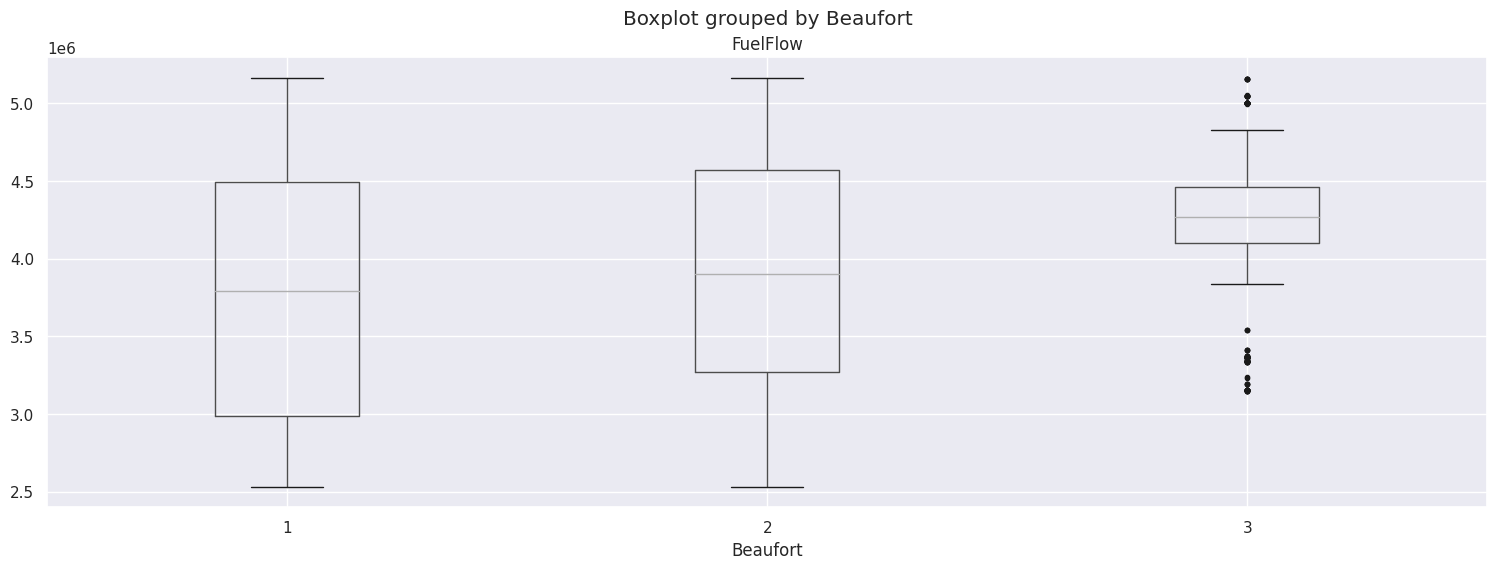

In [ ]:
merged_df.boxplot(column="FuelFlow", by='Beaufort', sym = 'k.', figsize=(18,6))

<Axes: title={'center': 'EngineRev'}, xlabel='Beaufort'>

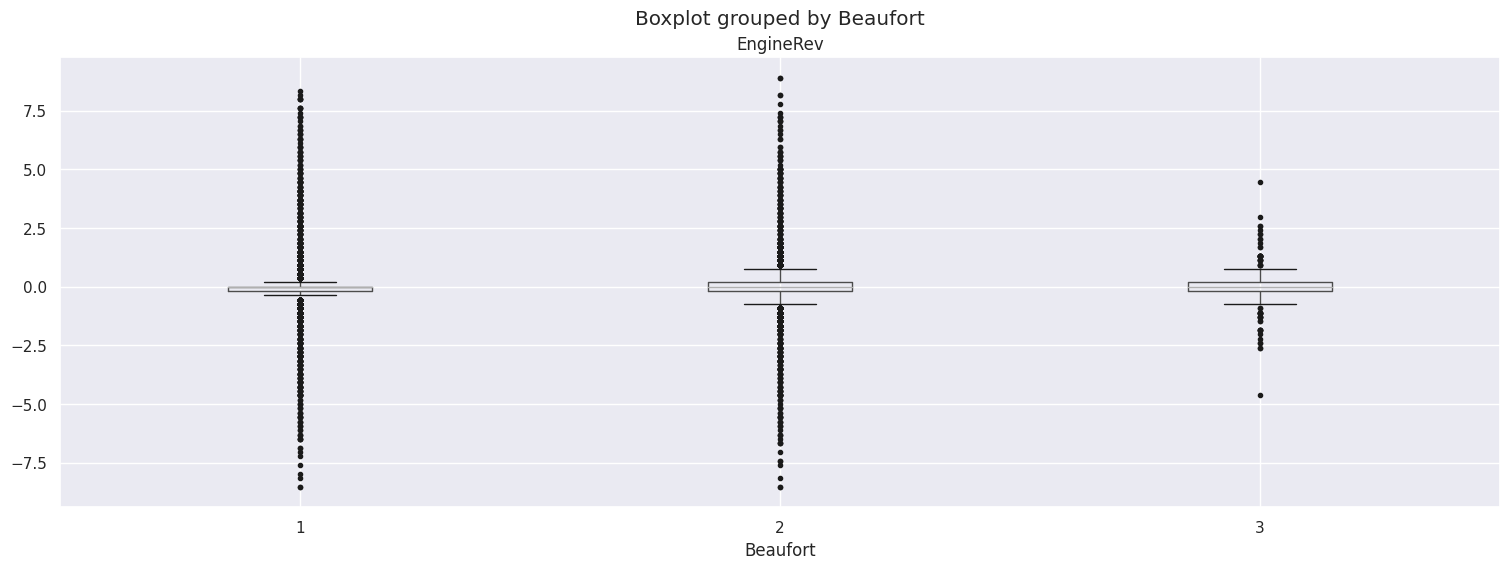

In [ ]:
timeseries.boxplot(column="EngineRev", by='Beaufort', sym = 'k.', figsize=(18,6))

#Normalization

In [ ]:
df_notnorm=merged_df.copy()
df_notnorm=df_notnorm.rename(columns={"M/E REVOLUTION":"EngineRev"})
df_notnorm=df_notnorm.rename(columns={"M/E F O FLOW COUNTER":"FuelFlow"})
merged_df.iloc[:,1:-1] = merged_df.iloc[:,1:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0) #normalization
merged_df

Latitude_degree  Longitude_degree  Beaufort  \
Date                                                               
2016-06-03 01:00:00        35.175000          1.362506  0.612992   
2016-06-03 02:00:00        35.315833          1.364723  0.612992   
2016-06-03 03:00:00        35.458333          1.366539  0.612992   
2016-06-03 04:00:00        35.573611          1.369819  0.612992   
2016-06-03 05:00:00        35.939722          1.371509  0.612992   
...                              ...               ...       ...   
2018-11-26 16:00:00        34.518611          1.331214 -1.233510   
2018-11-26 18:00:00        34.664722          1.330562 -1.233510   
2018-11-26 19:00:00        34.779444          1.327798 -1.233510   
2018-11-26 20:00:00        34.680000          1.329287 -1.233510   
2018-11-26 21:00:00        34.900000          1.331020 -1.233510   

                     Speed(Ground)  EngineRev  FuelFlow       vyg  DRAFT  
Date                                                                      
2016-06-03 01:00:00       0.496468   0.487675 -1.730330 -1.715797  9.175  
2016-06-03 02:00:00       0.802973   0.487675 -1.730111 -1.715797  9.175  
2016-06-03 03:00:00       0.841286   0.487675 -1.729898 -1.715797  9.175  
2016-06-03 04:00:00       0.726347   0.487675 -1.729687 -1.715797  9.175  
2016-06-03 05:00:00       0.994538   0.487675 -1.729477 -1.715797  9.175  
...                            ...        ...       ...       ...    ...  
2018-11-26 16:00:00      -1.993882  -2.731965  1.673576  1.653087  7.610  
2018-11-26 18:00:00      -2.147134  -2.731965  1.673633  1.653087  7.610  
2018-11-26 19:00:00      -1.342559  -2.272017  1.673679  1.653087  7.610  
2018-11-26 20:00:00      -2.300386  -3.375893  1.673726  1.653087  7.610  
2018-11-26 21:00:00      -2.108821  -2.731965  1.673759  1.653087  7.610  

[17173 rows x 8 columns]

               Beaufort  Speed(Ground)  EngineRev  FuelFlow       vyg  \
Beaufort       1.000000       0.009679   0.117421  0.104119  0.103905   
Speed(Ground)  0.009679       1.000000   0.907066 -0.038263 -0.032292   
EngineRev      0.117421       0.907066   1.000000  0.004630  0.009406   
FuelFlow       0.104119      -0.038263   0.004630  1.000000  0.999180   
vyg            0.103905      -0.032292   0.009406  0.999180  1.000000   
DRAFT          0.024247      -0.080851   0.004165  0.068018  0.058906   

                  DRAFT  
Beaufort       0.024247  
Speed(Ground) -0.080851  
EngineRev      0.004165  
FuelFlow       0.068018  
vyg            0.058906  
DRAFT          1.000000  


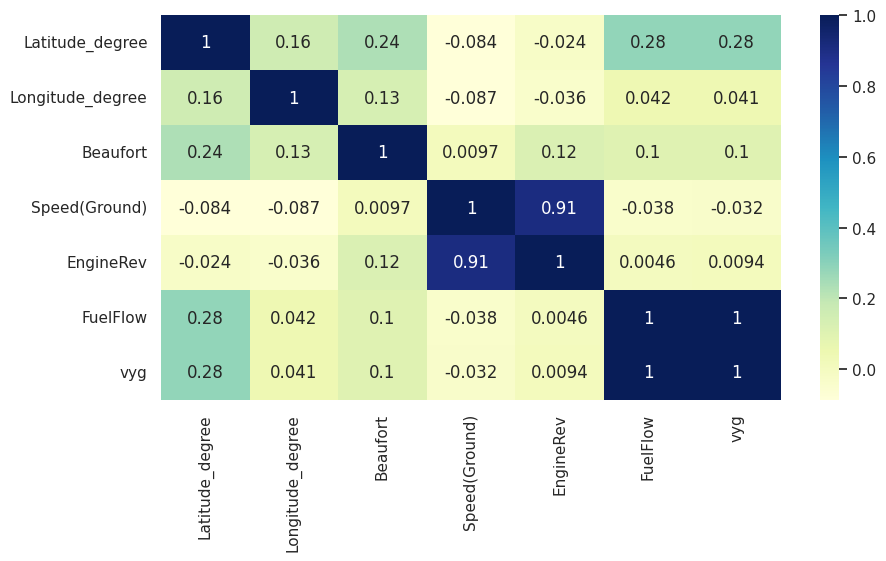

In [ ]:
import seaborn as sb
print(merged_df.iloc[:, 2:10].corr())

# plotting correlation heatmap
dataplot = sb.heatmap(merged_df.iloc[:, 0:-1].corr(), cmap="YlGnBu", annot=True)

correlacion considerable con latitude_degree  y fuelflow

array([[<Axes: title={'center': 'Latitude_degree'}>,
        <Axes: title={'center': 'Longitude_degree'}>,
        <Axes: title={'center': 'Beaufort'}>],
       [<Axes: title={'center': 'Speed(Ground)'}>,
        <Axes: title={'center': 'EngineRev'}>,
        <Axes: title={'center': 'FuelFlow'}>],
       [<Axes: title={'center': 'vyg'}>,
        <Axes: title={'center': 'DRAFT'}>, <Axes: >]], dtype=object)

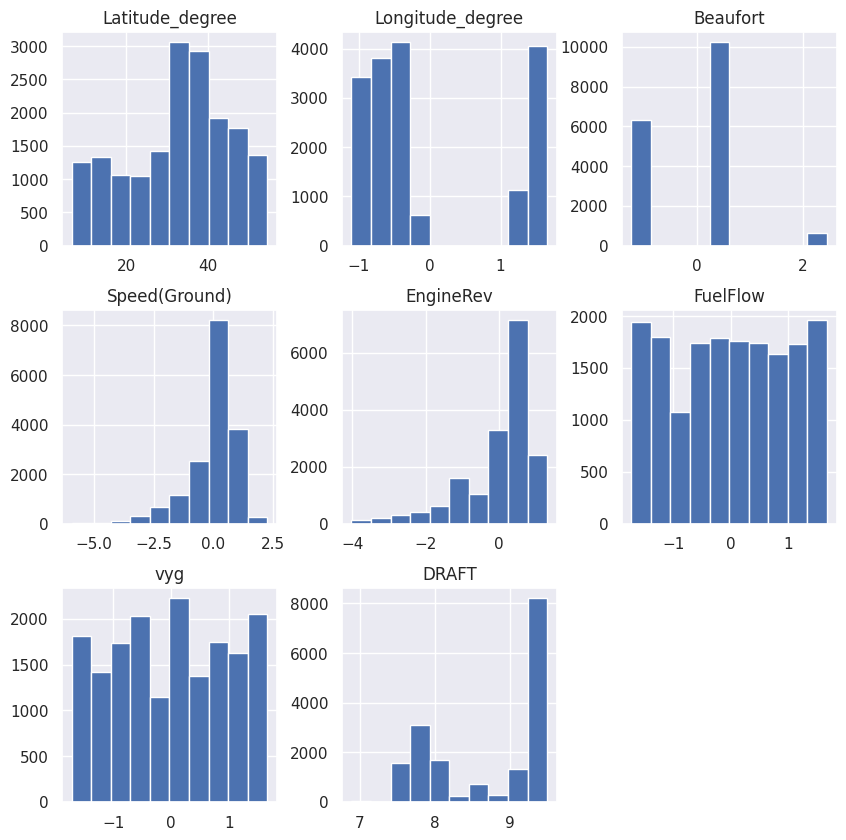

In [ ]:
merged_df.hist(figsize=(10,10))

<Axes: xlabel='Latitude_degree', ylabel='Longitude_degree'>

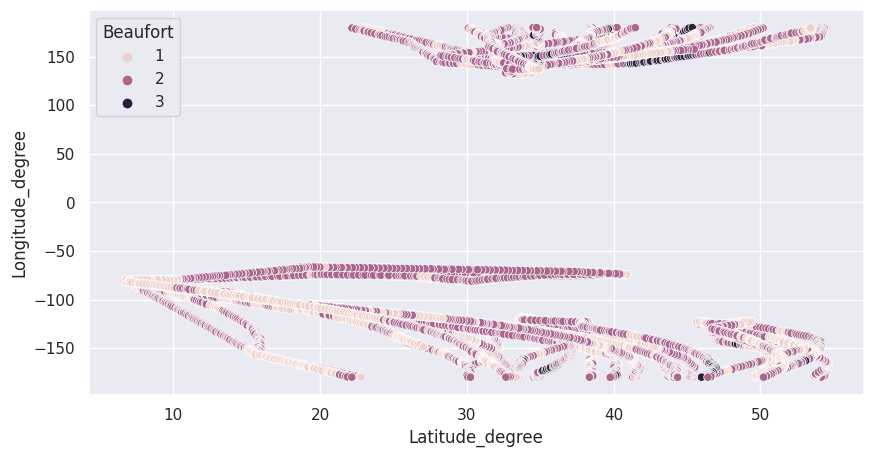

In [ ]:
import seaborn as sns
#sns.scatterplot(data=dfc, x="longitude", y="latitude", hue="size", palette="deep", size="median_house_value")
sns.scatterplot(data=df_notnorm, x="Latitude_degree", y="Longitude_degree", hue="Beaufort")

imagenes espaciales pueden ser entrenadas con red neuronal convolucional 2D

<Axes: xlabel='FuelFlow', ylabel='DRAFT'>

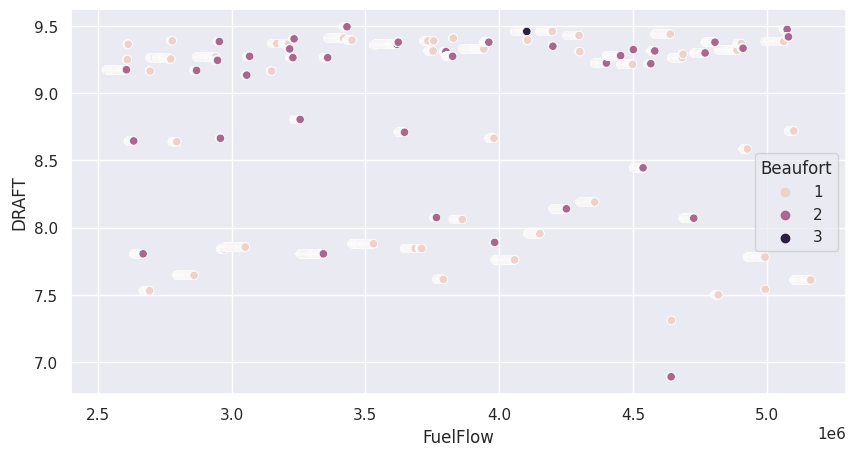

In [ ]:
sns.scatterplot(data=df_notnorm, x="FuelFlow", y="DRAFT", hue="Beaufort")

In [ ]:
plt.plot(merged_df.DRAFT,merged_df.FuelFlow)
plt.show()

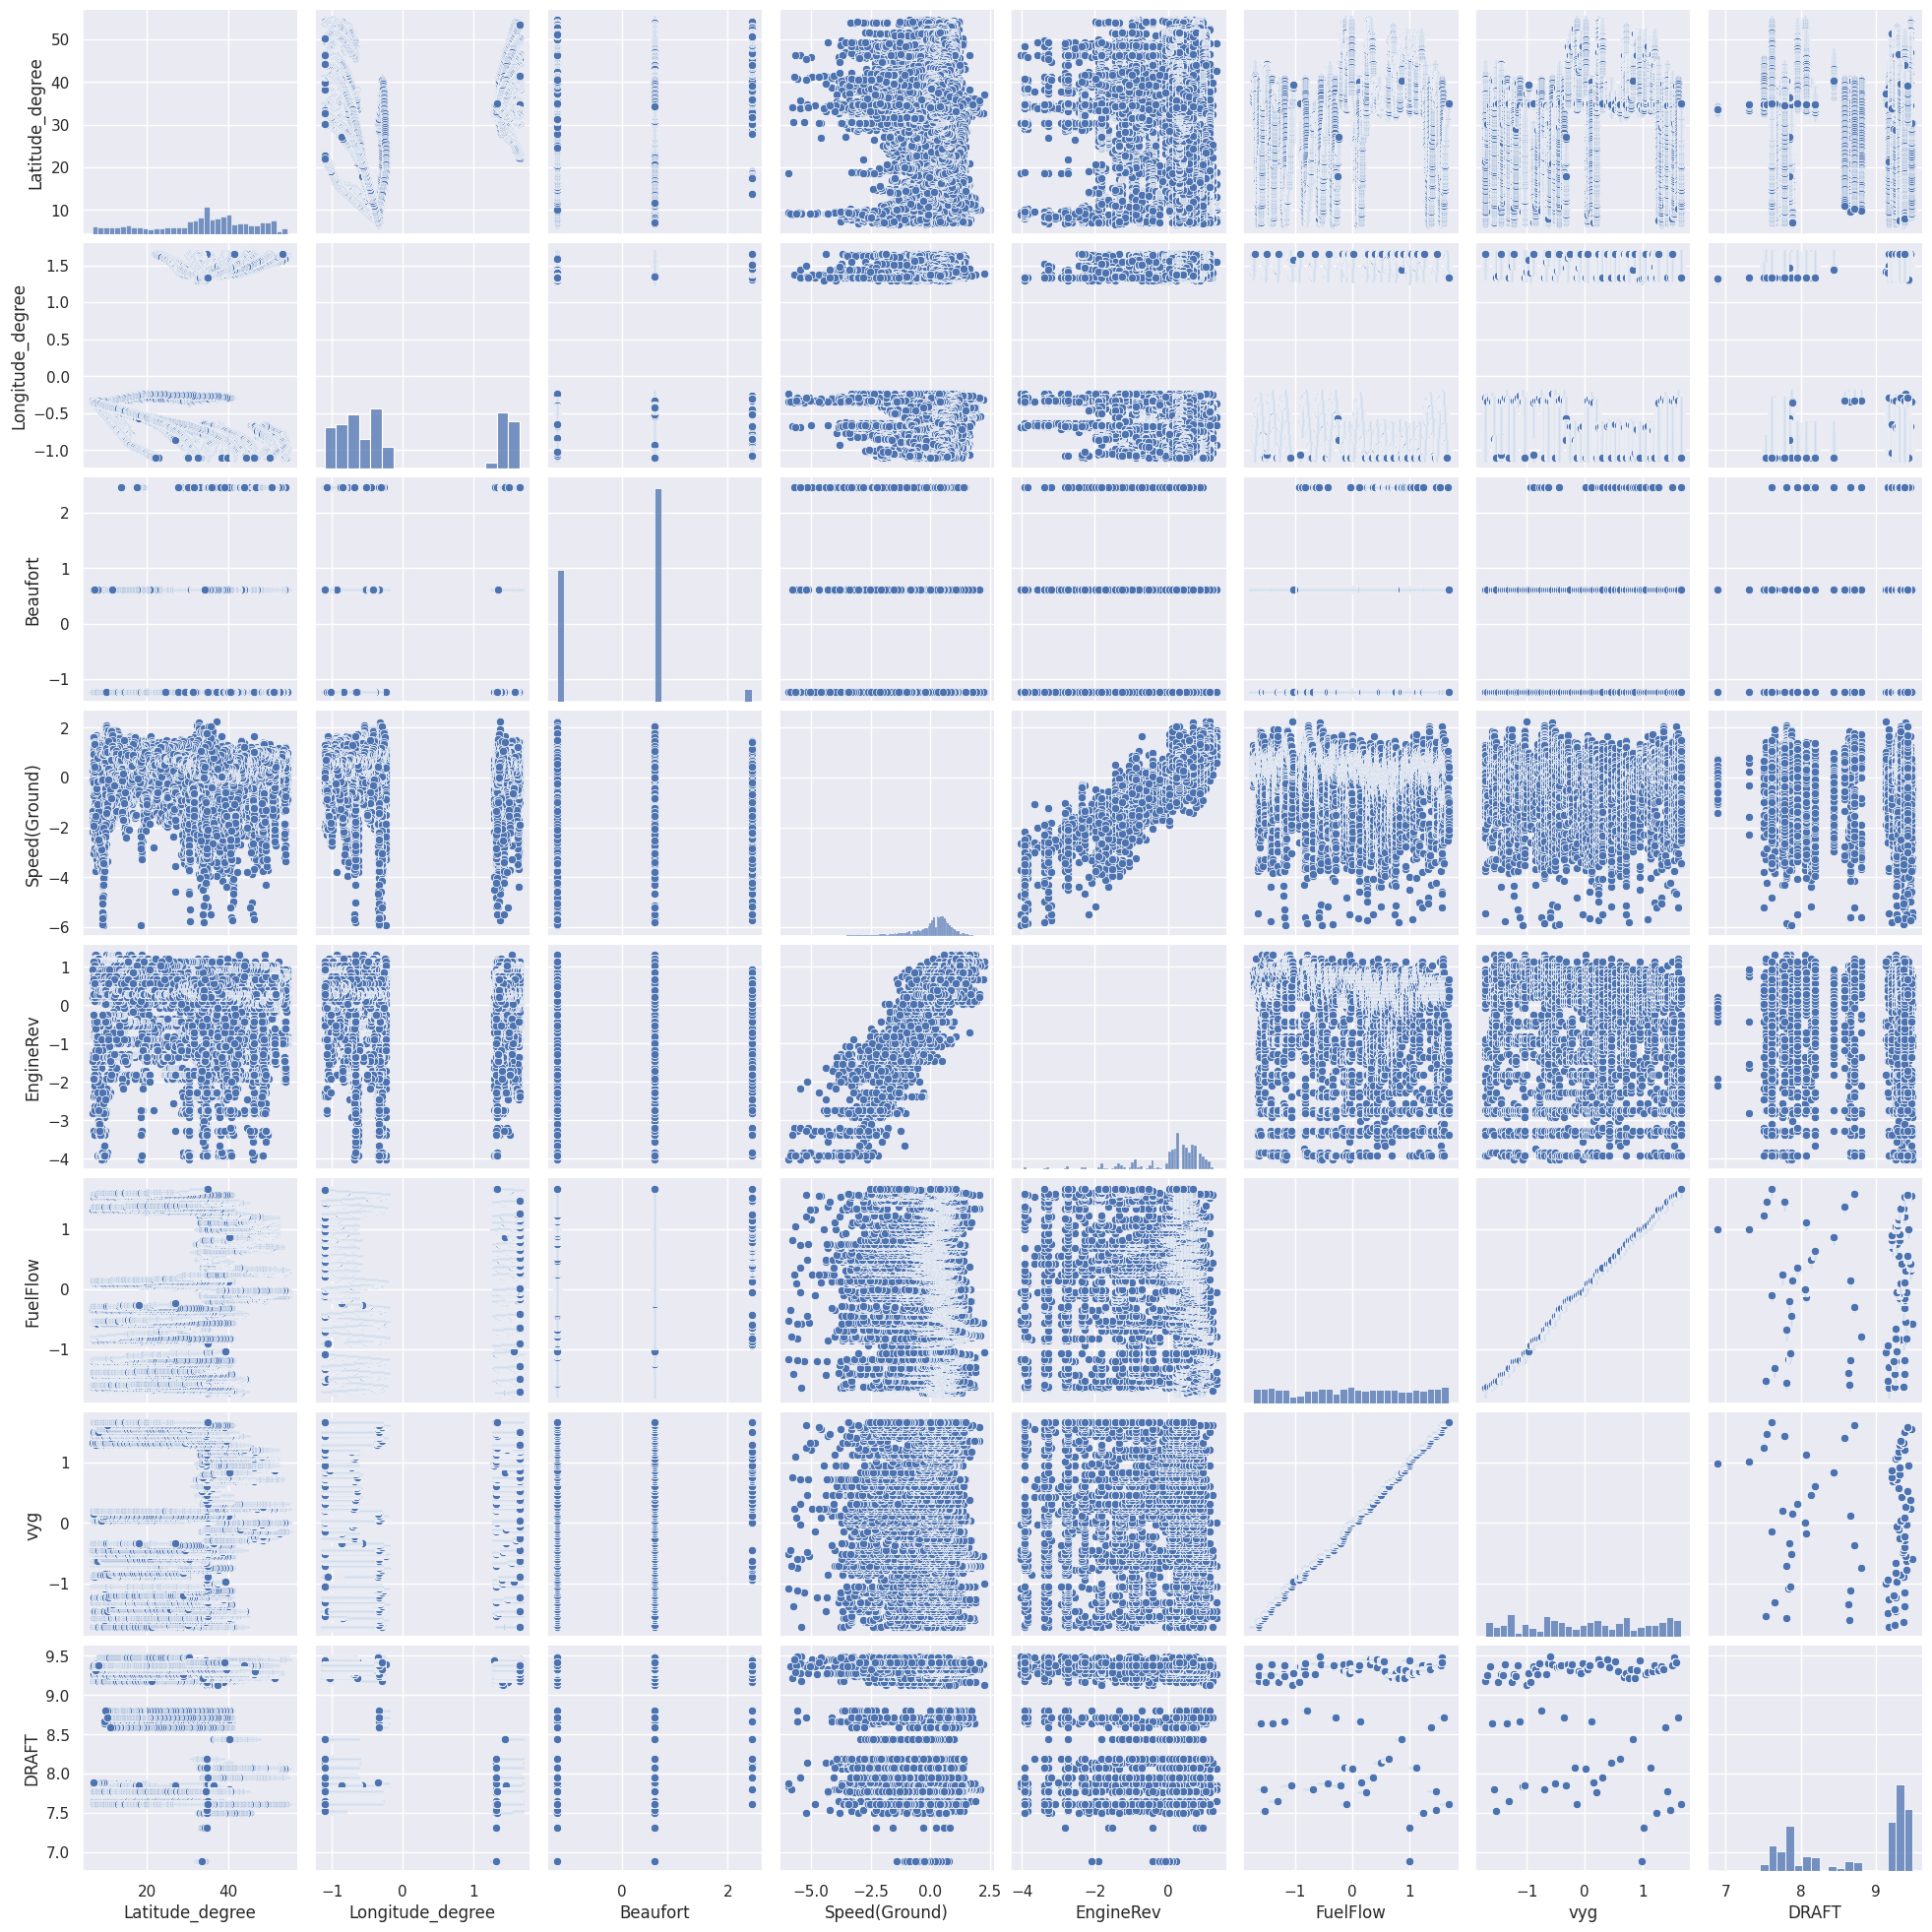

In [ ]:
import seaborn as sns

#penguins = sns.load_dataset("")
sns.pairplot(merged_df)

<Axes: xlabel='Date', ylabel='FuelFlow'>

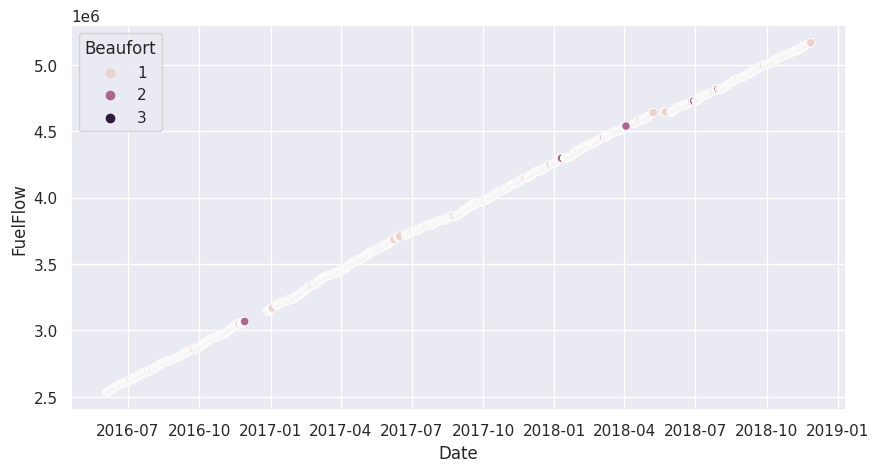

In [ ]:
sns.scatterplot(data=df_notnorm, x="Date", y="FuelFlow", hue="Beaufort")
#plt.plot(merged_df.index,merged_df.FuelFlow)

La informacion importante del flujo es el cambio de flujo por unidad de tiempo, es decir, una seria de tiempo, se puede agregar una columna nueva al data set con el cambio de flujo por hora

#time series

In [ ]:
#numdf = merged_df.drop("Beaufort", axis=1)#axis 1 for a column and axis=0 for a row
timeseries=df_notnorm.drop(["Beaufort"], axis=1).diff() #difference between values in 1 hour
timeseries["Beaufort"]=df_notnorm["Beaufort"]
null = timeseries.isnull().sum()
na = timeseries.isna().sum()
print(null,na)

timeseries

Latitude_degree     1
Longitude_degree    1
Speed(Ground)       1
EngineRev           1
FuelFlow            1
vyg                 1
DRAFT               1
Beaufort            0
dtype: int64 Latitude_degree     1
Longitude_degree    1
Speed(Ground)       1
EngineRev           1
FuelFlow            1
vyg                 1
DRAFT               1
Beaufort            0
dtype: int64


Latitude_degree  Longitude_degree  Speed(Ground)  \
Date                                                                    
2016-06-03 01:00:00              NaN               NaN            NaN   
2016-06-03 02:00:00         0.140833          0.288889            0.8   
2016-06-03 03:00:00         0.142500          0.236667            0.1   
2016-06-03 04:00:00         0.115278          0.427500           -0.3   
2016-06-03 05:00:00         0.366111          0.220278            0.7   
...                              ...               ...            ...   
2018-11-26 16:00:00        -0.041667         -0.269167            0.1   
2018-11-26 18:00:00         0.146111         -0.085000           -0.4   
2018-11-26 19:00:00         0.114722         -0.360278            2.1   
2018-11-26 20:00:00        -0.099444          0.194167           -2.5   
2018-11-26 21:00:00         0.220000          0.225833            0.5   

                     EngineRev  FuelFlow  vyg  DRAFT  Beaufort  
Date                                                            
2016-06-03 01:00:00        NaN       NaN  NaN    NaN         2  
2016-06-03 02:00:00        0.0     169.0  0.0    0.0         2  
2016-06-03 03:00:00        0.0     165.0  0.0    0.0         2  
2016-06-03 04:00:00        0.0     163.0  0.0    0.0         2  
2016-06-03 05:00:00        0.0     163.0  0.0    0.0         2  
...                        ...       ...  ...    ...       ...  
2018-11-26 16:00:00        1.0      33.0  0.0    0.0         1  
2018-11-26 18:00:00        0.0      44.0  0.0    0.0         1  
2018-11-26 19:00:00        5.0      35.0  0.0    0.0         1  
2018-11-26 20:00:00      -12.0      37.0  0.0    0.0         1  
2018-11-26 21:00:00        7.0      25.0  0.0    0.0         1  

[17173 rows x 8 columns]

In [ ]:
timeseries=timeseries.dropna()

null = timeseries.isnull().sum()
na = timeseries.isna().sum()
print(null,na)

timeseries=timeseries.rename(columns={"M/E REVOLUTION":"EngineRev"})
timeseries=timeseries.rename(columns={"M/E F O FLOW COUNTER":"FuelFlow"})


Latitude_degree     0
Longitude_degree    0
Speed(Ground)       0
EngineRev           0
FuelFlow            0
vyg                 0
DRAFT               0
Beaufort            0
dtype: int64 Latitude_degree     0
Longitude_degree    0
Speed(Ground)       0
EngineRev           0
FuelFlow            0
vyg                 0
DRAFT               0
Beaufort            0
dtype: int64


In [ ]:
#timeseries.FuelFlow.unique()

array([[<Axes: title={'center': 'Latitude_degree'}>,
        <Axes: title={'center': 'Longitude_degree'}>,
        <Axes: title={'center': 'Speed(Ground)'}>],
       [<Axes: title={'center': 'EngineRev'}>,
        <Axes: title={'center': 'FuelFlow'}>,
        <Axes: title={'center': 'vyg'}>],
       [<Axes: title={'center': 'DRAFT'}>,
        <Axes: title={'center': 'Beaufort'}>, <Axes: >]], dtype=object)

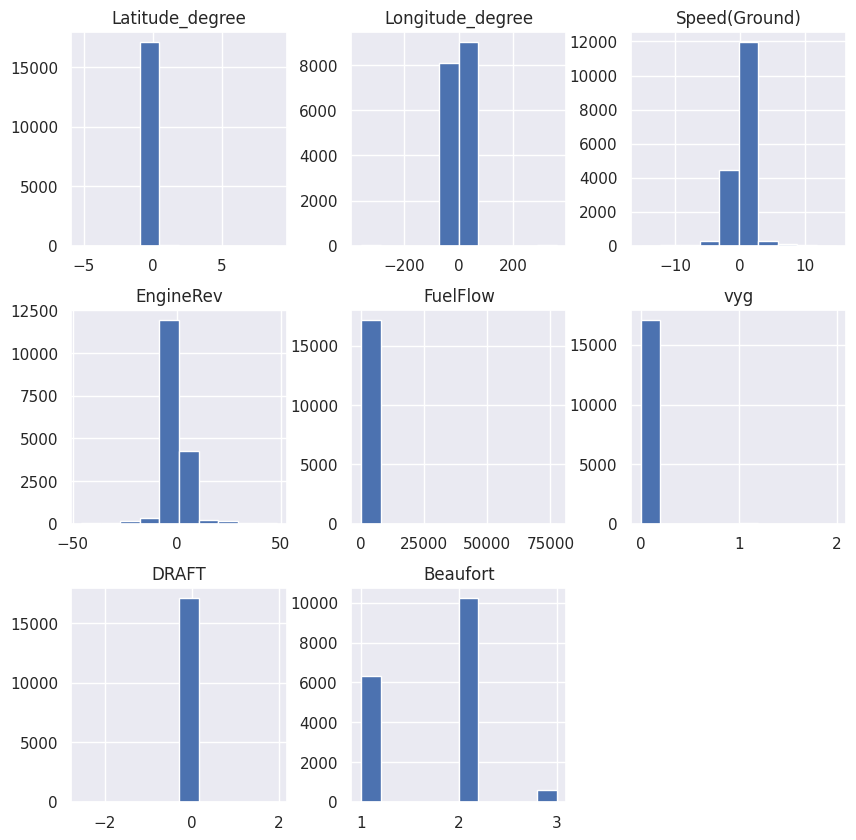

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


timeseries.hist(figsize=(10,10))

array([[<Axes: title={'center': 'Latitude_degree'}>,
        <Axes: title={'center': 'Longitude_degree'}>,
        <Axes: title={'center': 'Speed(Ground)'}>],
       [<Axes: title={'center': 'EngineRev'}>,
        <Axes: title={'center': 'FuelFlow'}>,
        <Axes: title={'center': 'vyg'}>],
       [<Axes: title={'center': 'DRAFT'}>,
        <Axes: title={'center': 'Beaufort'}>, <Axes: >]], dtype=object)

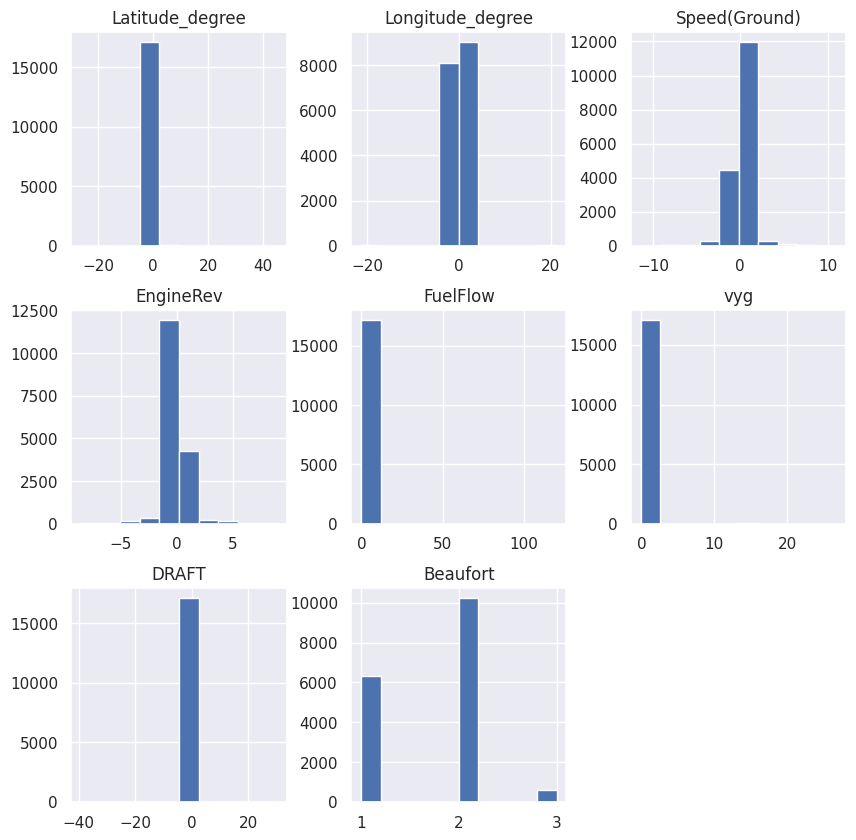

In [ ]:
timeseries.iloc[:,0:-1] = timeseries.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0) #normalization

timeseries.hist(figsize=(10,10))

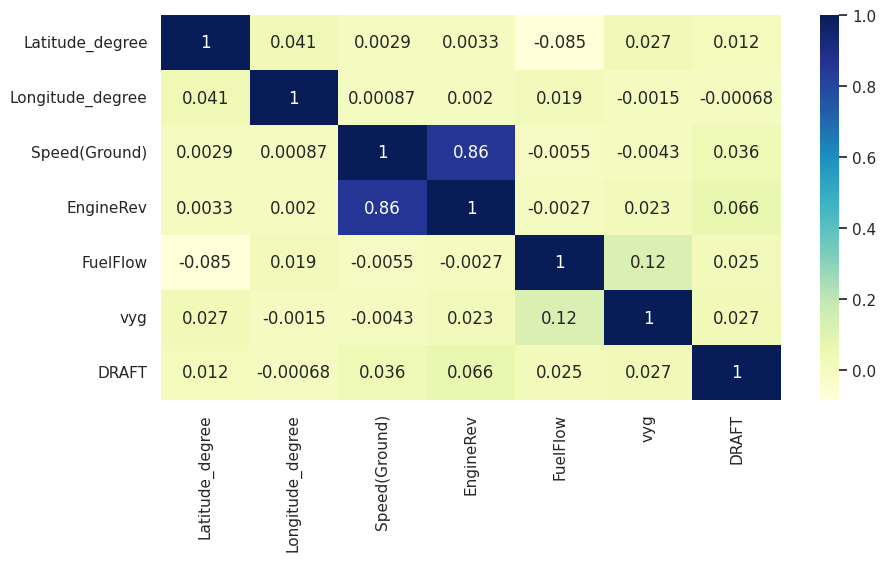

In [ ]:
# plotting correlation heatmap
dataplot = sb.heatmap(timeseries.iloc[:, 0:-1].corr(), cmap="YlGnBu", annot=True)

aqui se puede ver que la menor correlacion que tiene fuel flow en la serie de tiempo es con speed y vyg, lo que indica que estas dos caracteristicas se podrian omitir, ademas engine Rev tiene una gran correlacion con speed, naturalmente porque el motor es el que da la velocidad, indicando una sola caracteristca es suficiente de entre estas dos

<Axes: xlabel='DRAFT', ylabel='FuelFlow'>

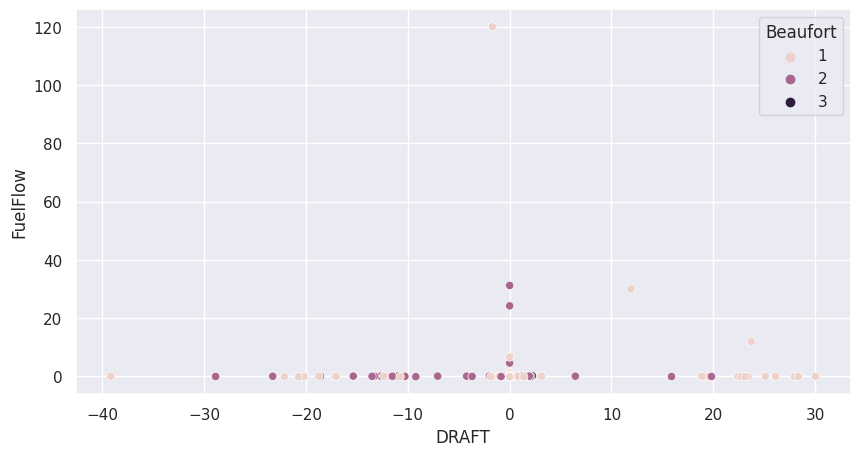

In [ ]:
sns.scatterplot(data=timeseries, x="DRAFT", y="FuelFlow", hue="Beaufort")
#plt.plot(timeseries.DRAFT,timeseries.FuelFlow)
#plt.show()

#Eliminate outlayers

<Axes: title={'center': 'FuelFlow'}, xlabel='Beaufort'>

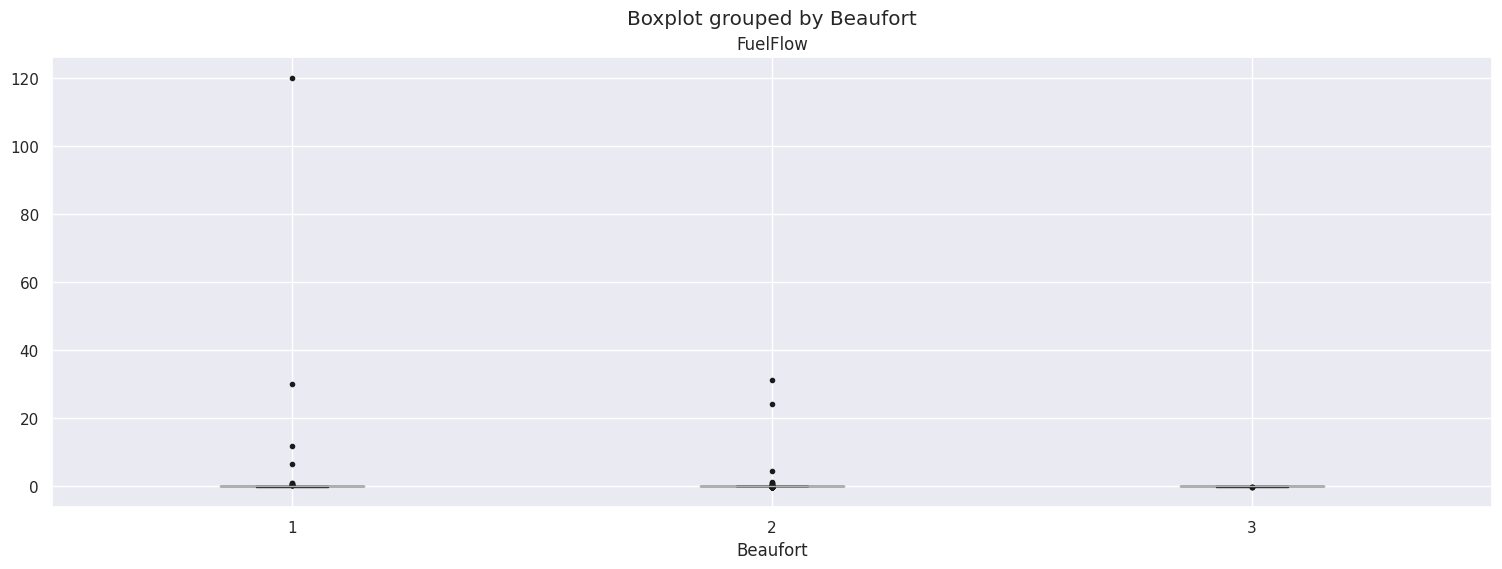

In [ ]:
timeseries.boxplot(column="FuelFlow", by='Beaufort', sym = 'k.', figsize=(18,6))

In [ ]:
#elimanate outlayers
Q1 = timeseries["FuelFlow"].quantile(0.25)
Q3 = timeseries["FuelFlow"].quantile(0.75)
IQR = Q3 - Q1
timeseries = timeseries[~((timeseries["FuelFlow"]< (Q1 - 1.5 * IQR)) | (timeseries["FuelFlow"] > (Q3 + 1.5* IQR)))]
timeseries

#Q1 = timeseries["DRAFT"].quantile(0.25)
#Q3 = timeseries["DRAFT"].quantile(0.75)
#IQR = Q3 - Q1
#timeseries = timeseries[~((timeseries["DRAFT"]< (Q1 - 1.5 * IQR)) | (timeseries["DRAFT"] > (Q3 + 1.5* IQR)))]
#timeseries

Latitude_degree  Longitude_degree  Speed(Ground)  \
Date                                                                    
2016-06-03 02:00:00         0.707888          0.017113       0.595458   
2016-06-03 03:00:00         0.716265          0.014022       0.074690   
2016-06-03 04:00:00         0.579450          0.025316      -0.222892   
2016-06-03 05:00:00         1.840102          0.013052       0.521062   
2016-06-03 06:00:00         0.647857          0.022078       0.595458   
...                              ...               ...            ...   
2018-11-26 05:00:00        -0.110209         -0.023200      -0.297287   
2018-11-26 06:00:00        -0.065535         -0.009768       1.190621   
2018-11-26 07:00:00         0.219264         -0.021458      -1.264427   
2018-11-26 08:00:00         0.048943         -0.006677       0.669853   
2018-11-26 09:00:00         1.185345         -0.013056       0.446667   

                     EngineRev  FuelFlow       vyg   DRAFT  Beaufort  
Date                                                                  
2016-06-03 02:00:00   0.000378  0.024278 -0.070267  0.0014         2  
2016-06-03 03:00:00   0.000378  0.018062 -0.070267  0.0014         2  
2016-06-03 04:00:00   0.000378  0.014954 -0.070267  0.0014         2  
2016-06-03 05:00:00   0.000378  0.014954 -0.070267  0.0014         2  
2016-06-03 06:00:00   0.000378  0.011846 -0.070267  0.0014         1  
...                        ...       ...       ...     ...       ...  
2018-11-26 05:00:00   0.185920 -0.128016 -0.070267  0.0014         2  
2018-11-26 06:00:00  -0.370706 -0.126462 -0.070267  0.0014         1  
2018-11-26 07:00:00   0.185920 -0.131124 -0.070267  0.0014         1  
2018-11-26 08:00:00  -0.185164 -0.128016 -0.070267  0.0014         1  
2018-11-26 09:00:00   0.371463 -0.128016 -0.070267  0.0014         1  

[16287 rows x 8 columns]

<Axes: title={'center': 'FuelFlow'}, xlabel='Beaufort'>

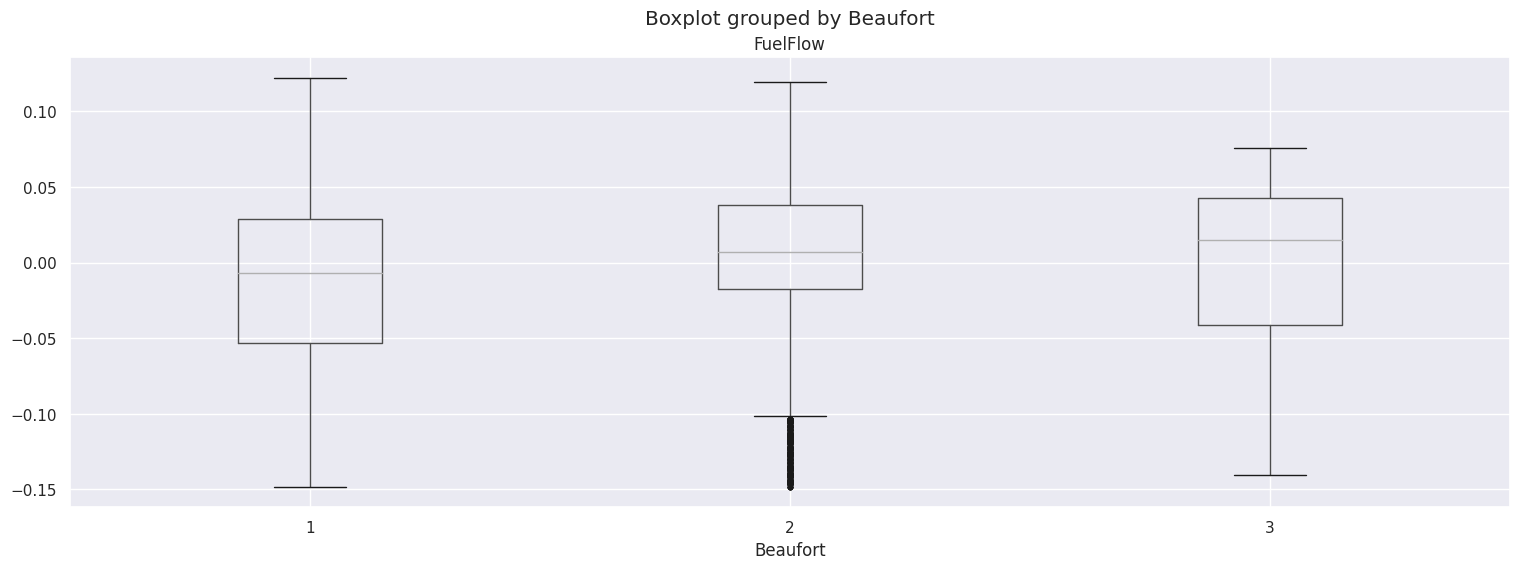

In [ ]:
timeseries.boxplot(column="FuelFlow", by='Beaufort', sym = 'k.', figsize=(18,6))

<Axes: xlabel='DRAFT', ylabel='FuelFlow'>

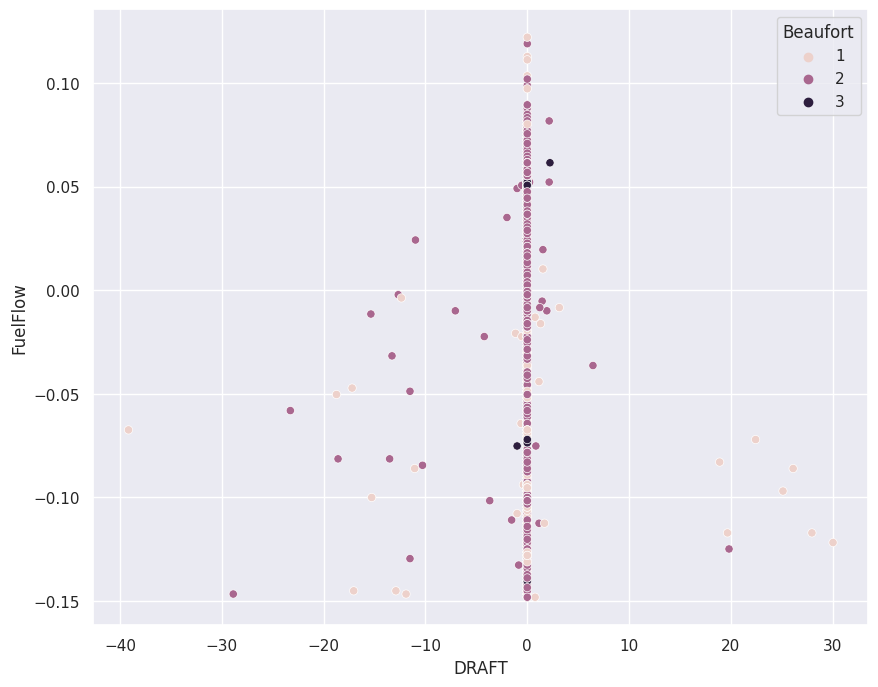

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=timeseries, x="DRAFT", y="FuelFlow", hue="Beaufort")

<Axes: xlabel='FuelFlow', ylabel='count'>

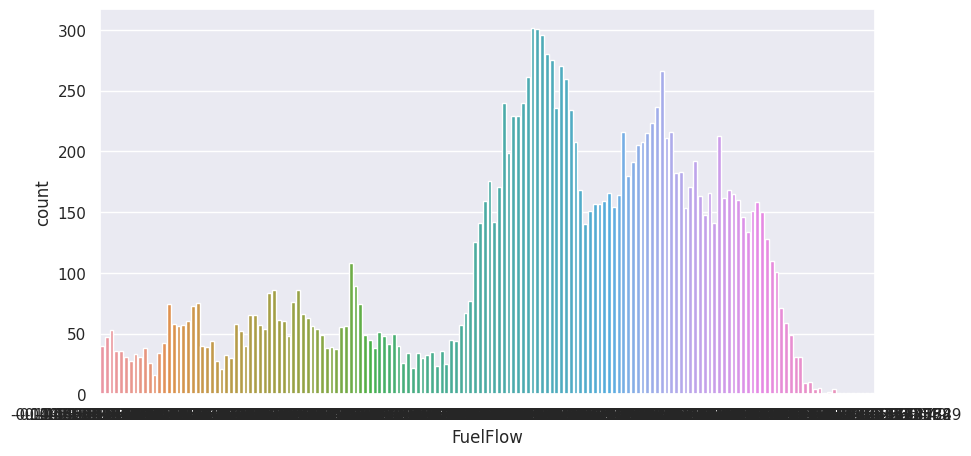

In [ ]:
sns.countplot(data=timeseries,x="FuelFlow")

La mayoria de cambios en el combustible son grandes, ocurren pocos cambios pequeños

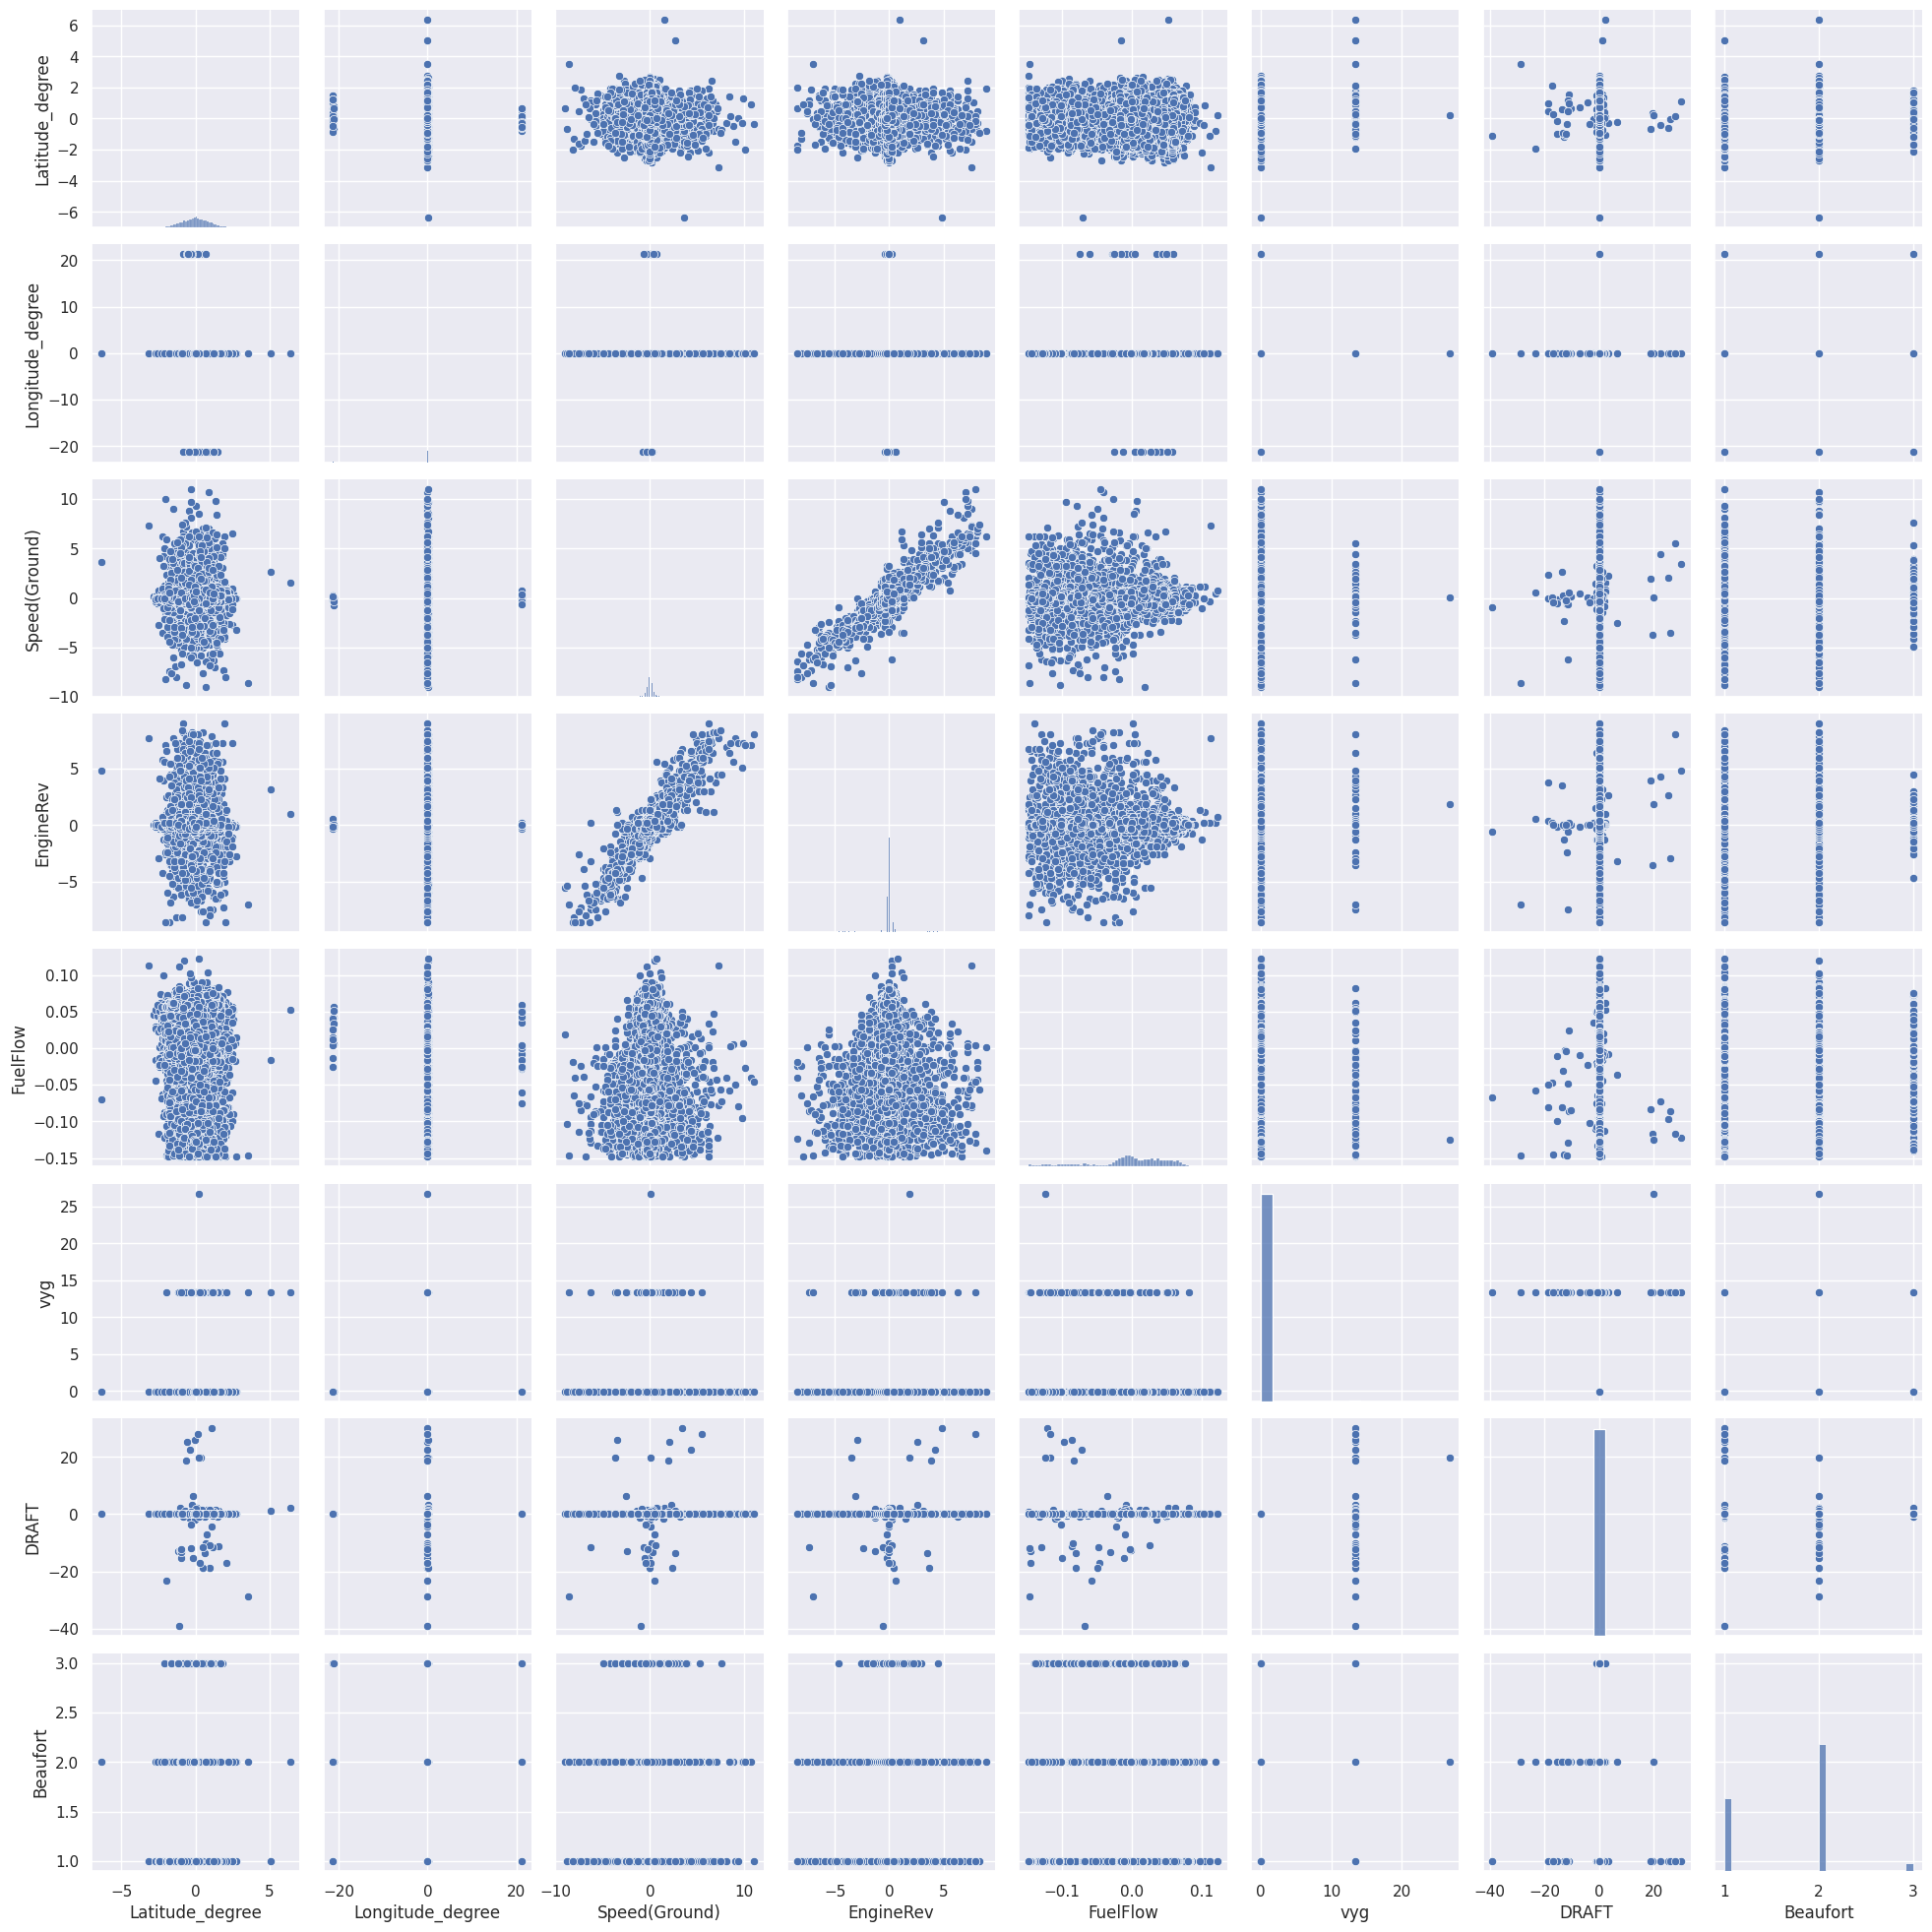

In [ ]:
import seaborn as sns

#penguins = sns.load_dataset("")
sns.pairplot(timeseries)

se podria introducir una nueva caracteristica de delta tiempo


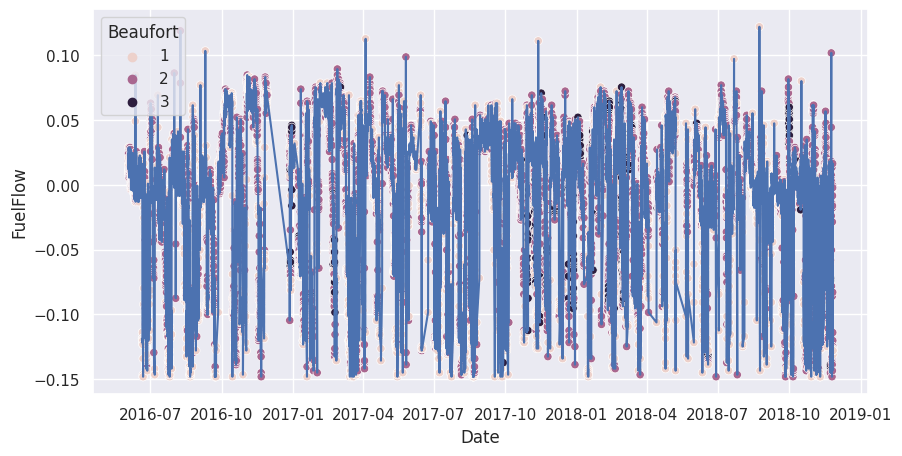

In [ ]:
sns.set(rc={"figure.figsize":(10, 5)}) #width=3, #height=4
sns.scatterplot(data=timeseries, x="Date", y="FuelFlow", hue="Beaufort")
plt.plot(timeseries.index,timeseries.FuelFlow)
print("se podria introducir una nueva caracteristica de delta tiempo")


esto indica que hay patrones temporales, por lo que se podria introducir una nueva caracteristica de delta tiempo

#Introducimos el cambio en el flujo de combustible por hora como nueva caracteristica, que ademas será nuestro target de lo que queremos que el modelo prediga

In [ ]:
merged_df


Latitude_degree  Longitude_degree  Beaufort  \
Date                                                               
2016-06-03 01:00:00        35.175000          1.362506  0.612992   
2016-06-03 02:00:00        35.315833          1.364723  0.612992   
2016-06-03 03:00:00        35.458333          1.366539  0.612992   
2016-06-03 04:00:00        35.573611          1.369819  0.612992   
2016-06-03 05:00:00        35.939722          1.371509  0.612992   
...                              ...               ...       ...   
2018-11-26 16:00:00        34.518611          1.331214 -1.233510   
2018-11-26 18:00:00        34.664722          1.330562 -1.233510   
2018-11-26 19:00:00        34.779444          1.327798 -1.233510   
2018-11-26 20:00:00        34.680000          1.329287 -1.233510   
2018-11-26 21:00:00        34.900000          1.331020 -1.233510   

                     Speed(Ground)  EngineRev  FuelFlow       vyg  DRAFT  
Date                                                                      
2016-06-03 01:00:00       0.496468   0.487675 -1.730330 -1.715797  9.175  
2016-06-03 02:00:00       0.802973   0.487675 -1.730111 -1.715797  9.175  
2016-06-03 03:00:00       0.841286   0.487675 -1.729898 -1.715797  9.175  
2016-06-03 04:00:00       0.726347   0.487675 -1.729687 -1.715797  9.175  
2016-06-03 05:00:00       0.994538   0.487675 -1.729477 -1.715797  9.175  
...                            ...        ...       ...       ...    ...  
2018-11-26 16:00:00      -1.993882  -2.731965  1.673576  1.653087  7.610  
2018-11-26 18:00:00      -2.147134  -2.731965  1.673633  1.653087  7.610  
2018-11-26 19:00:00      -1.342559  -2.272017  1.673679  1.653087  7.610  
2018-11-26 20:00:00      -2.300386  -3.375893  1.673726  1.653087  7.610  
2018-11-26 21:00:00      -2.108821  -2.731965  1.673759  1.653087  7.610  

[17173 rows x 8 columns]

In [ ]:
merged_df["deltafflow"]=timeseries["FuelFlow"]
merged_df=merged_df.dropna()
merged_df = merged_df.drop(["vyg","FuelFlow"], axis=1) #axis 1 for a column and axis=0 for a row
#merged_df = merged_df.drop("Speed(Ground)", axis=1)
merged_df

Latitude_degree  Longitude_degree  Beaufort  \
Date                                                               
2016-06-03 02:00:00        35.315833          1.364723  0.612992   
2016-06-03 03:00:00        35.458333          1.366539  0.612992   
2016-06-03 04:00:00        35.573611          1.369819  0.612992   
2016-06-03 05:00:00        35.939722          1.371509  0.612992   
2016-06-03 06:00:00        36.068611          1.374369 -1.233510   
...                              ...               ...       ...   
2018-11-26 05:00:00        34.271389          1.351764  0.612992   
2018-11-26 06:00:00        34.258333          1.350496 -1.233510   
2018-11-26 07:00:00        34.301944          1.347713 -1.233510   
2018-11-26 08:00:00        34.311667          1.346845 -1.233510   
2018-11-26 09:00:00        34.547500          1.345151 -1.233510   

                     Speed(Ground)  EngineRev  DRAFT  deltafflow  
Date                                                              
2016-06-03 02:00:00       0.802973   0.487675  9.175    0.024278  
2016-06-03 03:00:00       0.841286   0.487675  9.175    0.018062  
2016-06-03 04:00:00       0.726347   0.487675  9.175    0.014954  
2016-06-03 05:00:00       0.994538   0.487675  9.175    0.014954  
2016-06-03 06:00:00       1.301043   0.487675  9.175    0.011846  
...                            ...        ...    ...         ...  
2018-11-26 05:00:00      -1.534125  -1.260130  7.610   -0.128016  
2018-11-26 06:00:00      -0.921116  -1.444109  7.610   -0.126462  
2018-11-26 07:00:00      -1.572438  -1.352120  7.610   -0.131124  
2018-11-26 08:00:00      -1.227620  -1.444109  7.610   -0.128016  
2018-11-26 09:00:00      -0.997742  -1.260130  7.610   -0.128016  

[16287 rows x 7 columns]

In [ ]:
dfTest=dfTest.set_index("Date")
dfTest

Latitude_degree  Longitude_degree Beaufort  \
Date                                                              
2018-11-27 10:00:00        34.750556        137.318056      low   
2018-11-27 11:00:00        34.751111        137.317222      low   
2018-11-27 12:00:00        34.750556        137.317500      low   
2018-11-27 13:00:00        34.751389        137.317500      low   
2018-11-27 14:00:00        34.750833        137.317500      low   
...                              ...               ...      ...   
2019-06-02 19:00:00        33.175278       -132.280278   medium   
2019-06-02 20:00:00        33.053056       -131.792500   medium   
2019-06-02 21:00:00        33.093333       -131.602500   medium   
2019-06-02 22:00:00        32.785000       -131.243333   medium   
2019-06-02 23:00:00        32.718333       -130.841667   medium   

                     Speed(Ground)  M/E REVOLUTION  
Date                                                
2018-11-27 10:00:00            0.0               0  
2018-11-27 11:00:00            0.0               0  
2018-11-27 12:00:00            0.0               0  
2018-11-27 13:00:00            0.0               0  
2018-11-27 14:00:00            0.0               0  
...                            ...             ...  
2019-06-02 19:00:00           17.9              92  
2019-06-02 20:00:00           17.8              91  
2019-06-02 21:00:00           17.5              91  
2019-06-02 22:00:00           17.5              92  
2019-06-02 23:00:00           17.7              92  

[4429 rows x 5 columns]

#clean test data

In [ ]:
#FullDrafts=FullDrafts.set_index("Date")
FullDrafts=FullDrafts[FullDrafts.index > "2018"]
FullDrafts

vyg  DRAFT
Date                           
2018-01-16 00:00:00   61  9.310
2018-01-18 00:00:00   62  8.190
2018-02-02 00:00:00   63  7.490
2018-02-03 00:00:00   64  9.225
2018-02-15 00:00:00   65  9.280
2018-03-07 00:00:00   66  9.215
2018-03-21 00:00:00   67  9.325
2018-03-23 00:00:00   68  8.445
2018-04-13 07:00:00   69  9.220
2018-04-16 00:00:00   70  9.315
2018-04-21 00:00:00   71  9.440
2018-05-22 00:00:00   72  6.890
2018-05-23 00:00:00   73  7.310
2018-05-31 00:00:00   74  9.265
2018-06-11 00:00:00   75  9.290
2018-06-14 00:00:00   76  8.070
2018-07-02 00:00:00   77  9.300
2018-07-12 00:00:00   78  9.380
2018-07-26 00:00:00   79  7.500
2018-08-04 00:00:00   80  9.320
2018-08-23 00:00:00   81  9.370
2018-08-29 00:00:00   82  9.335
2018-09-01 00:00:00   83  8.585
2018-09-07 00:00:00   84  7.780
2018-09-27 00:00:00   85  7.540
2018-09-29 00:00:00   86  9.385
2018-10-20 00:00:00   87  9.475
2018-10-26 00:00:00   88  9.420
2018-10-29 00:00:00   89  8.720
2018-11-05 00:00:00   90  7.610
2018-11-28 00:00:00   91  9.460
2018-12-15 00:00:00   92  8.175
2019-01-02 00:00:00   93  7.345
2019-01-04 00:00:00   94  7.340
2019-01-18 01:00:00   95  7.430
2019-01-21 00:00:00   96  9.310
2019-02-11 00:00:00   97  9.220
2019-02-16 00:00:00   98  9.150
2019-02-19 00:00:00   99  8.430
2019-02-25 00:00:00  100  7.610
2019-02-26 00:00:00  101  7.600
2019-03-17 01:00:00  102  7.410
2019-03-19 00:00:00  103  9.415
2019-04-01 00:00:00  104  9.190
2019-04-04 00:00:00  105  8.145
2019-04-21 01:00:00  106  7.425
2019-04-23 09:00:00  107  9.335
2019-05-07 00:00:00  108  9.240
2019-05-21 01:00:00  109  7.435
2019-05-23 00:00:00  110  9.350

In [ ]:
testDrafts=FullDrafts[FullDrafts.index > "2018"]
#dfTD
#leftjoin or merge
#merged_df=pd.merge(dfT,dfTD, on="Date",how="outer") #outer,inner,left,right
dfTest=pd.merge(dfTest,testDrafts, on="Date",how="left")
dfTest["DRAFT"][0]=FullDrafts.loc["2018-11-05 00:00:00"][-1] # this is to put manually the preivous draft for the first row in the merged array
dfTest

<ipython-input-445-64700bbab38f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["DRAFT"][0]=FullDrafts.loc["2018-11-05 00:00:00"][-1] # this is to put manually the preivous draft for the first row in the merged array


Latitude_degree  Longitude_degree Beaufort  \
Date                                                              
2018-11-27 10:00:00        34.750556        137.318056      low   
2018-11-27 11:00:00        34.751111        137.317222      low   
2018-11-27 12:00:00        34.750556        137.317500      low   
2018-11-27 13:00:00        34.751389        137.317500      low   
2018-11-27 14:00:00        34.750833        137.317500      low   
...                              ...               ...      ...   
2019-06-02 19:00:00        33.175278       -132.280278   medium   
2019-06-02 20:00:00        33.053056       -131.792500   medium   
2019-06-02 21:00:00        33.093333       -131.602500   medium   
2019-06-02 22:00:00        32.785000       -131.243333   medium   
2019-06-02 23:00:00        32.718333       -130.841667   medium   

                     Speed(Ground)  M/E REVOLUTION  vyg  DRAFT  
Date                                                            
2018-11-27 10:00:00            0.0               0  NaN   7.61  
2018-11-27 11:00:00            0.0               0  NaN    NaN  
2018-11-27 12:00:00            0.0               0  NaN    NaN  
2018-11-27 13:00:00            0.0               0  NaN    NaN  
2018-11-27 14:00:00            0.0               0  NaN    NaN  
...                            ...             ...  ...    ...  
2019-06-02 19:00:00           17.9              92  NaN    NaN  
2019-06-02 20:00:00           17.8              91  NaN    NaN  
2019-06-02 21:00:00           17.5              91  NaN    NaN  
2019-06-02 22:00:00           17.5              92  NaN    NaN  
2019-06-02 23:00:00           17.7              92  NaN    NaN  

[4429 rows x 7 columns]

In [ ]:
# Define the mapping of strings to numerical values
mapping = {'low': 1, 'medium': 2, 'high': 3}
# Use the replace method to replace strings with numerical values
dfTest['Beaufort'] = dfTest['Beaufort'].replace(mapping)
dfTest=dfTest.rename(columns={"M/E REVOLUTION":"EngineRev"})
dfTest.iloc[:,0:-1] = dfTest.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0) #normalization
dfTest["DRAFT"] = dfTest['DRAFT'].fillna(method='ffill')
dfTest.dropna()
dfTest=dfTest.drop("vyg", axis=1)
dfTest

Latitude_degree  Longitude_degree  Beaufort  \
Date                                                               
2018-11-27 10:00:00         0.419223          1.071210 -1.275183   
2018-11-27 11:00:00         0.419288          1.071204 -1.275183   
2018-11-27 12:00:00         0.419223          1.071206 -1.275183   
2018-11-27 13:00:00         0.419321          1.071206 -1.275183   
2018-11-27 14:00:00         0.419256          1.071206 -1.275183   
...                              ...               ...       ...   
2019-06-02 19:00:00         0.235190         -0.844536  0.662973   
2019-06-02 20:00:00         0.220911         -0.841070  0.662973   
2019-06-02 21:00:00         0.225617         -0.839720  0.662973   
2019-06-02 22:00:00         0.189595         -0.837168  0.662973   
2019-06-02 23:00:00         0.181807         -0.834313  0.662973   

                     Speed(Ground)  EngineRev  DRAFT  
Date                                                  
2018-11-27 10:00:00      -2.252023  -2.130820   7.61  
2018-11-27 11:00:00      -2.252023  -2.130820   7.61  
2018-11-27 12:00:00      -2.252023  -2.130820   7.61  
2018-11-27 13:00:00      -2.252023  -2.130820   7.61  
2018-11-27 14:00:00      -2.252023  -2.130820   7.61  
...                            ...        ...    ...  
2019-06-02 19:00:00       0.697830   0.768148   9.35  
2019-06-02 20:00:00       0.681350   0.736637   9.35  
2019-06-02 21:00:00       0.631911   0.736637   9.35  
2019-06-02 22:00:00       0.631911   0.768148   9.35  
2019-06-02 23:00:00       0.664870   0.768148   9.35  

[4429 rows x 6 columns]

#Features and targets of the datatset

In [ ]:
# features and labels or targets
X = merged_df.drop(['deltafflow'], axis=1)  # Características
y = merged_df['deltafflow']  # Variable objetivo
X

Date
2016-06-03 02:00:00    0.024278
2016-06-03 03:00:00    0.018062
2016-06-03 04:00:00    0.014954
2016-06-03 05:00:00    0.014954
2016-06-03 06:00:00    0.011846
                         ...   
2018-11-26 05:00:00   -0.128016
2018-11-26 06:00:00   -0.126462
2018-11-26 07:00:00   -0.131124
2018-11-26 08:00:00   -0.128016
2018-11-26 09:00:00   -0.128016
Name: deltafflow, Length: 16287, dtype: float64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#split the training dataset into training and validation parts
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# predictive model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation of the model with labeled data
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

Mean Squared Error on Validation Set: 0.0005173283893646339


it seems that a "simple" model oflinear regression performs well with this problem

#Hacemos la prediccion de los datos Test

In [ ]:
# predictions
y_test_pred = model.predict(dfTest)

dfTest["deltafflow"]=y_test_pred
dfTest

Latitude_degree  Longitude_degree  Beaufort  \
Date                                                               
2018-11-27 10:00:00         0.419223          1.071210 -1.275183   
2018-11-27 11:00:00         0.419288          1.071204 -1.275183   
2018-11-27 12:00:00         0.419223          1.071206 -1.275183   
2018-11-27 13:00:00         0.419321          1.071206 -1.275183   
2018-11-27 14:00:00         0.419256          1.071206 -1.275183   
...                              ...               ...       ...   
2019-06-02 19:00:00         0.235190         -0.844536  0.662973   
2019-06-02 20:00:00         0.220911         -0.841070  0.662973   
2019-06-02 21:00:00         0.225617         -0.839720  0.662973   
2019-06-02 22:00:00         0.189595         -0.837168  0.662973   
2019-06-02 23:00:00         0.181807         -0.834313  0.662973   

                     Speed(Ground)  EngineRev  DRAFT  deltafflow  
Date                                                              
2018-11-27 10:00:00      -2.252023  -2.130820   7.61   -0.148094  
2018-11-27 11:00:00      -2.252023  -2.130820   7.61   -0.148094  
2018-11-27 12:00:00      -2.252023  -2.130820   7.61   -0.148094  
2018-11-27 13:00:00      -2.252023  -2.130820   7.61   -0.148094  
2018-11-27 14:00:00      -2.252023  -2.130820   7.61   -0.148094  
...                            ...        ...    ...         ...  
2019-06-02 19:00:00       0.697830   0.768148   9.35    0.035803  
2019-06-02 20:00:00       0.681350   0.736637   9.35    0.033692  
2019-06-02 21:00:00       0.631911   0.736637   9.35    0.034387  
2019-06-02 22:00:00       0.631911   0.768148   9.35    0.036734  
2019-06-02 23:00:00       0.664870   0.768148   9.35    0.036274  

[4429 rows x 7 columns]

Podriamos intentar una red neuronal 1D para series de tiempo, a pesar que nuestro unico dato de serie de tiempo es el cambio de flujo por hora




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Construir el modelo de red neuronal 1D
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida para regresión lineal

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Entrenar el modelo
history=model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val))


In [ ]:
# 11. Convergencia del modelo
import matplotlib.pyplot as plt
# Graficar la curva de loss
plt.plot (history.history ['loss'], label='loss')
plt.plot (history.history ['val_loss'], label='val_loss')
plt.title ('Curva de loss')
plt.xlabel ('Época')
plt.ylabel ('Loss')
plt.legend ()
plt.show ()
# Graficar la curva de accuracy
plt.plot (history.history ['accuracy'], label='accuracy')
plt.plot (history.history ['val_accuracy'], label='accuracy')
plt.title ('Curva de accuracy')
plt.xlabel ('Época')
plt.ylabel ('accuracy')
plt.legend ()
plt.show ()

"""
# Evaluate the model
#valFeat,ValLabels=valid_dataset
#print(valid_dataset.)
score = model.evaluate(valid_dataset, valid_dataset.y, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test AUC: {score[1]}')
"""

# Access loss and accuracy values
loss_values = history.history['loss']
accuracy_values = history.history['accuracy']

# Print the last values (end of training)
final_loss = loss_values[-1]
final_accuracy = accuracy_values[-1]

print(f'Final Loss: {final_loss}')
print(f'Final Accuracy: {final_accuracy}')
